# Sandu_Dhruva_HW1
# Vertebral Column Data

## (a) Download Data

### Package install and imports

In [2]:
!pip install pandas scipy matplotlib seaborn numpy scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the dataset

In [4]:
data_path = '../data/vertebral_column_data/column_2C_weka.arff'
data, meta = arff.loadarff(data_path)
df = pd.DataFrame(data)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [4]:
X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df['class']

In [5]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [6]:
y

0      b'Abnormal'
1      b'Abnormal'
2      b'Abnormal'
3      b'Abnormal'
4      b'Abnormal'
          ...     
305      b'Normal'
306      b'Normal'
307      b'Normal'
308      b'Normal'
309      b'Normal'
Name: class, Length: 310, dtype: object

### Encoding the target variable

In [7]:
le = LabelEncoder()
y_encoded = (y == b'Abnormal').astype(int)  # Abnormal=1, Normal=0
y_encoded


0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: class, Length: 310, dtype: int64

## (b) Pre-processing and EDA

### i. Making scatterplots of independent variables

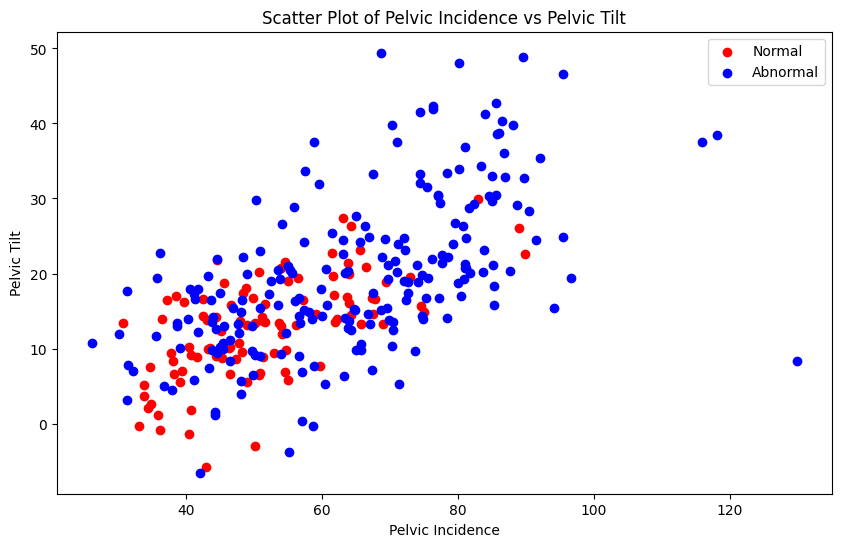

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y_encoded == 0]['pelvic_incidence'], X[y_encoded == 0]['pelvic_tilt'], c='red', label='Normal')
plt.scatter(X[y_encoded == 1]['pelvic_incidence'], X[y_encoded == 1]['pelvic_tilt'], c='blue', label='Abnormal')
plt.xlabel('Pelvic Incidence')
plt.ylabel('Pelvic Tilt')
plt.title('Scatter Plot of Pelvic Incidence vs Pelvic Tilt')
plt.legend()
plt.show()

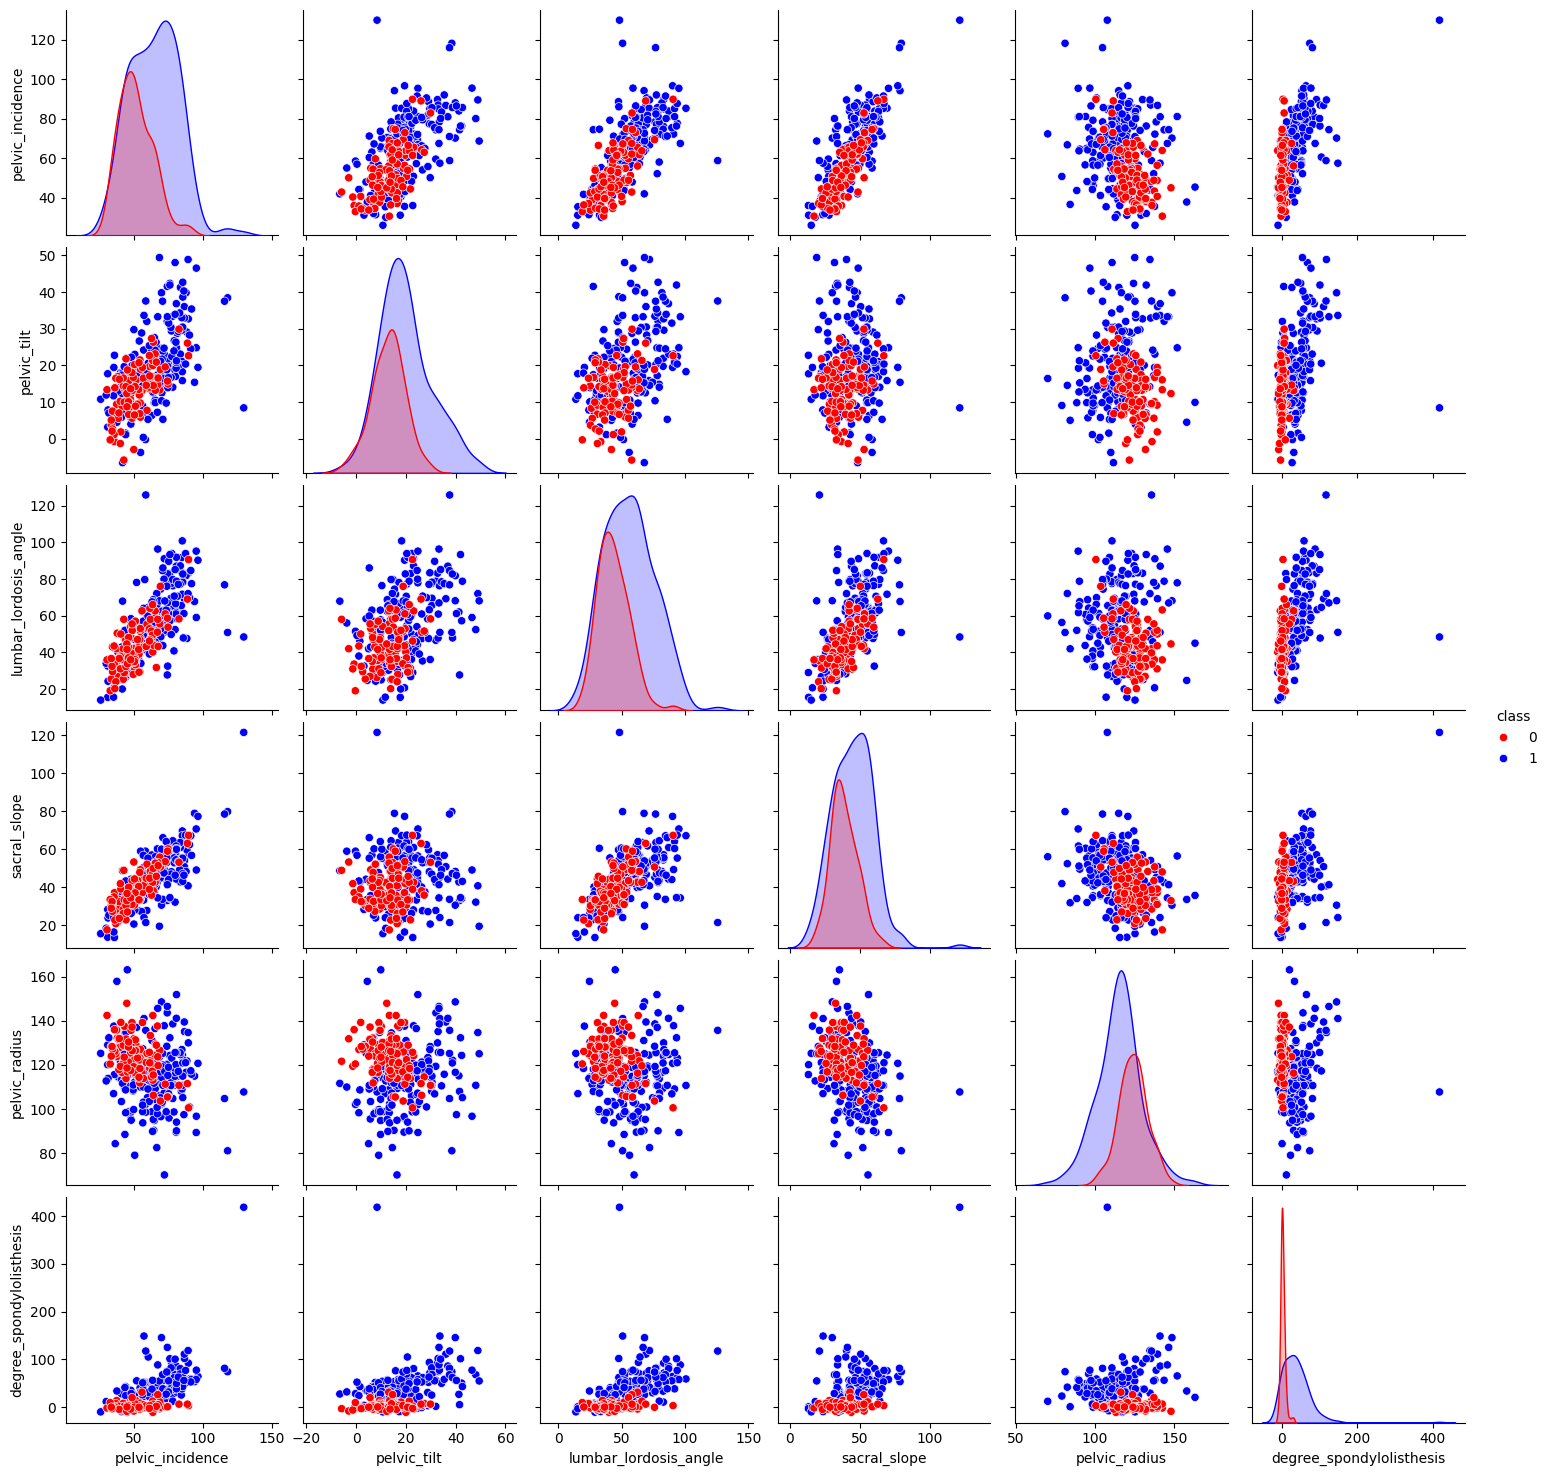

In [9]:
df_plot = X.copy()
df_plot['class'] = y_encoded

sns.pairplot(df_plot, hue='class', palette=['red', 'blue'])
plt.show()

### ii. Making boxplots for independent variables

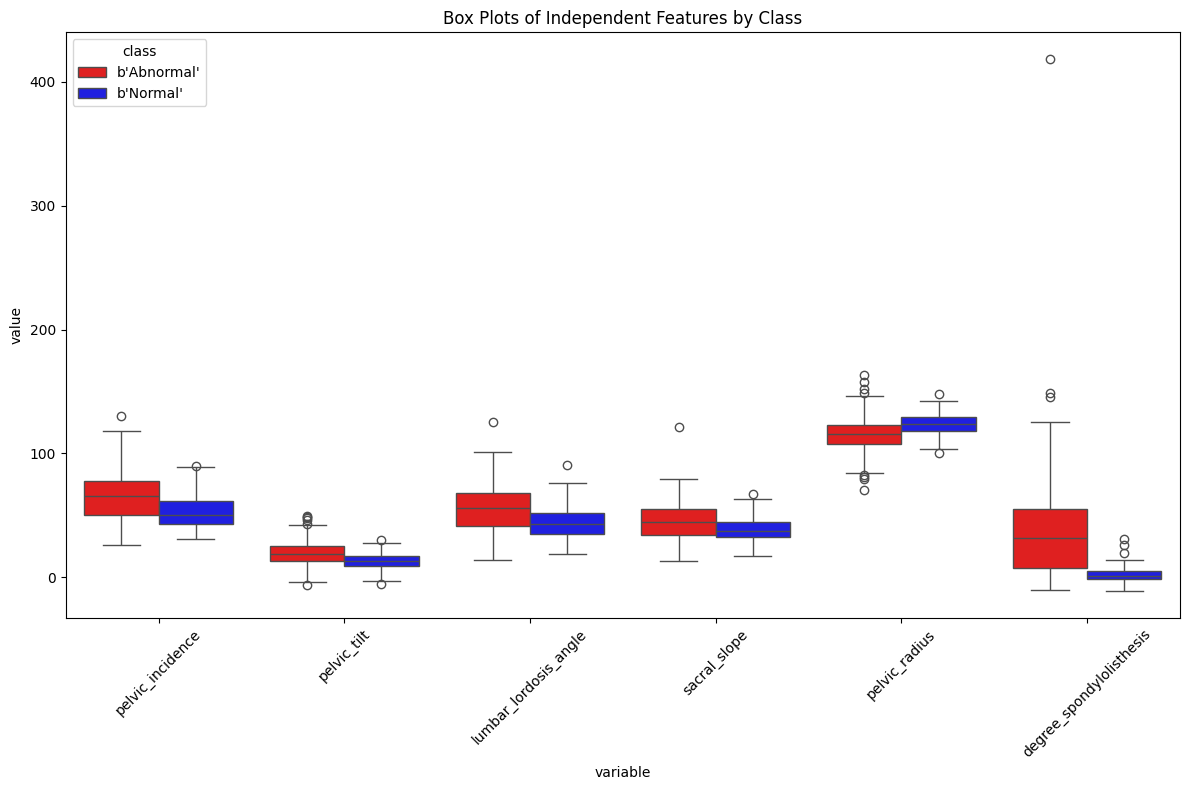

In [10]:
feature_names = X.columns
df_melted = pd.melt(df, id_vars=['class'], value_vars=feature_names, var_name='variable', value_name='value')

plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='class', data=df_melted, palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Box Plots of Independent Features by Class')
plt.tight_layout()
plt.show()




### iii. Arranging data into train and test sets

#### Checking class distribution 

In [11]:
print("Class distribution:")
print(df['class'].value_counts())

Class distribution:
class
b'Abnormal'    210
b'Normal'      100
Name: count, dtype: int64


In [12]:
df_plot

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [13]:
class0_data = df_plot[y_encoded == 0]
class1_data = df_plot[y_encoded == 1]

class0_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [14]:
class1_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [15]:
train_class0 = class0_data.iloc[:70]  # First 70 rows of Class 0
train_class1 = class1_data.iloc[:140]  # First 140 rows of Class 1
train_set = pd.concat([train_class0, train_class1], ignore_index=True)
train_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
205,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
206,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
207,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
208,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [16]:
test_class0 = class0_data.iloc[70:]   # Remaining rows of Class 0
test_class1 = class1_data.iloc[140:]  # Remaining rows of Class 1
test_set = pd.concat([test_class0, test_class1], ignore_index=True)
test_set


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
1,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
2,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
3,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
4,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
95,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
96,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
97,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
98,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [17]:
X_train = train_set[feature_names]
y_train = train_set['class']
X_test = test_set[feature_names]
y_test = test_set['class']




In [18]:
print(f"\nTraining set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")
print(f"Training set class distribution:")
print(y_train.value_counts())
print(f"Test set class distribution:")
print(y_test.value_counts())


Training set size: 210
Test set size: 100
Training set class distribution:
class
1    140
0     70
Name: count, dtype: int64
Test set class distribution:
class
1    70
0    30
Name: count, dtype: int64


## (c) Classification using KNN on Vertebral Column Data Set

### i. KNN with Euclidean metric

#### checking with random k value '5'

In [19]:
def knn_classifier(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred

In [20]:
y_pred = knn_classifier(X_train, y_train, X_test, k=5)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=5: {accuracy:.4f}")

Accuracy with k=5: 0.9000


### ii. checking for k from 208 to 1

In [22]:
k_values = list(range(208, 0, -1))
train_errors = []
test_errors = []

print("Testing KNN with different k values...")

for i, k in enumerate(k_values):
    # Skip if k is larger than training set size
    if k > len(X_train):
        continue
        
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    # Get predictions
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    # Calculate error rates
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    # Print progress every 20 iterations
    if (i + 1) % 20 == 0:
        print(f"Completed {i + 1}/{len(k_values)} k values")


Testing KNN with different k values...
Completed 20/208 k values
Completed 40/208 k values
Completed 60/208 k values
Completed 80/208 k values
Completed 100/208 k values
Completed 120/208 k values
Completed 140/208 k values
Completed 160/208 k values
Completed 180/208 k values
Completed 200/208 k values


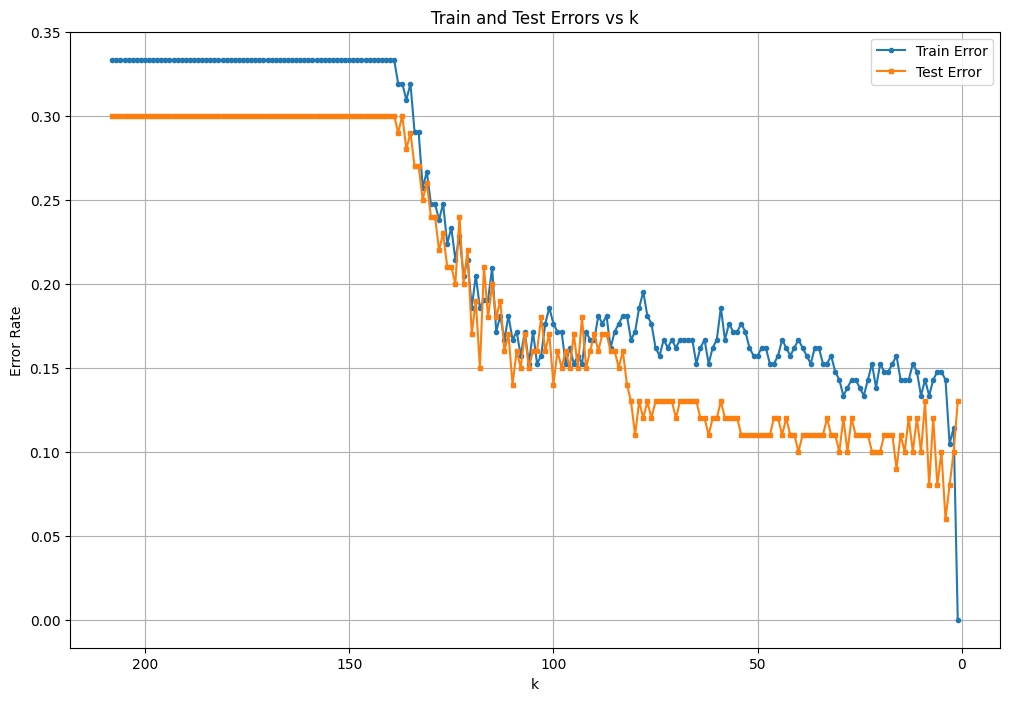

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(k_values[:len(train_errors)], train_errors, label='Train Error', marker='o', markersize=3)
plt.plot(k_values[:len(test_errors)], test_errors, label='Test Error', marker='s', markersize=3)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors vs k')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Reverse x-axis to show k from high to low
plt.show()

#### most suitable k

In [24]:
optimal_k_idx = np.argmin(test_errors)
optimal_k = k_values[optimal_k_idx]
min_test_error = test_errors[optimal_k_idx]

print(f"\nOptimal k* = {optimal_k}")
print(f"Minimum test error = {min_test_error:.4f}")


Optimal k* = 4
Minimum test error = 0.0600


#### Train KNN with optimal k

In [25]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

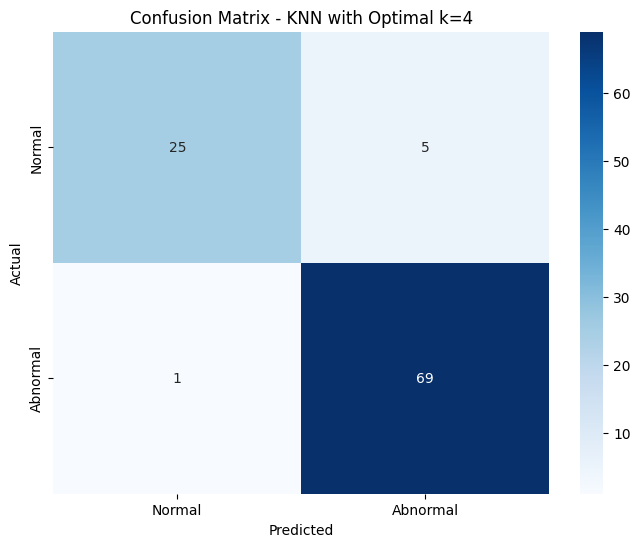

In [26]:
cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Abnormal'], 
            yticklabels=['Normal', 'Abnormal'])
plt.title('Confusion Matrix - KNN with Optimal k=4')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)  # True Positive Rate
tnr = tn / (tn + fp)  # True Negative Rate
precision = tp / (tp + fp)
f1 = 2 * (precision * tpr) / (precision + tpr)

print(f"True Positive Rate: {tpr:.4f}")
print(f"True Negative Rate: {tnr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

True Positive Rate: 0.9857
True Negative Rate: 0.8333
Precision: 0.9324
F1-score: 0.9583


In [28]:
train_class0 = df[df['class'] == b'Normal']
train_class1 = df[df['class'] == b'Abnormal']

train_class0

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,b'Normal'
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,b'Normal'
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,b'Normal'
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,b'Normal'
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,b'Normal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


### iii. using subsets of training sets

In [29]:
N_values = list(range(10, 211, 10))  # 10,20,...,210
best_test_errors = []
best_ks = []

for N in N_values:
    n0 = N // 3
    n1 = N - n0

    subset = pd.concat(
        [train_class0.iloc[:n0], train_class1.iloc[:n1]],
        ignore_index=True
    )

    X_subset = subset[feature_names]
    y_subset_encoded = (subset['class'] == b'Abnormal').astype(int)

    # Candidate ks: 1,6,11,... <= N
    k_candidates = [k for k in range(1, N + 1, 5)]

    best_err = np.inf
    best_k = None

    for k in k_candidates:
        if k > len(X_subset):
            continue
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_subset, y_subset_encoded)
        y_pred = knn.predict(X_test)
        err = 1 - accuracy_score(y_test, y_pred)

        if err < best_err:
            best_err = err
            best_k = k

    best_test_errors.append(best_err)
    best_ks.append(best_k)

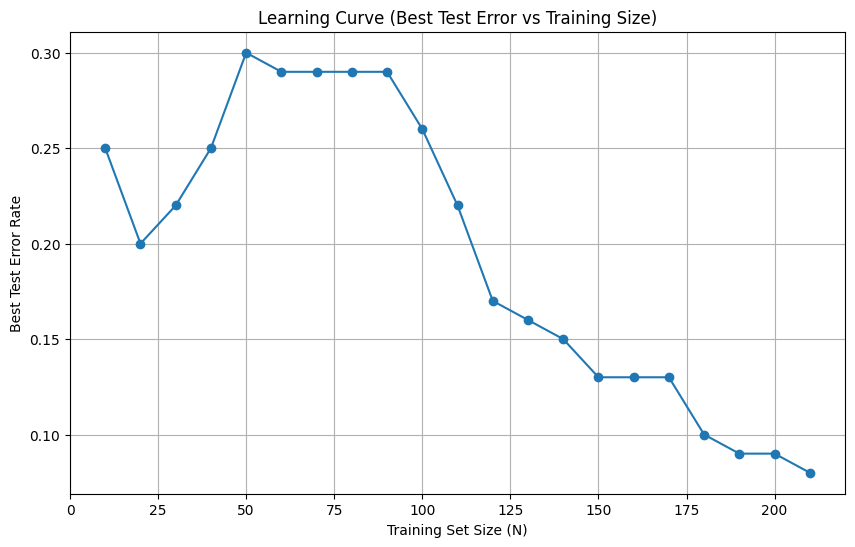

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, best_test_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve (Best Test Error vs Training Size)')
plt.grid(True)
plt.show()


In [31]:
best_k_df = pd.DataFrame({
    'Training_Size_N': N_values,
    'Best_k': best_ks,
    'Test_Error': best_test_errors
})

print("Best k values per Training Size N:")
print(best_k_df.to_string(index=False))

print("\nBest Results:")
for i, (n, k, error) in enumerate(zip(N_values, best_ks, best_test_errors)):
    print(f"N={n:3d}: k*={k:2d}, Test Error={error:.4f}")
    if (i + 1) % 5 == 0:  
        print()

Best k values per Training Size N:
 Training_Size_N  Best_k  Test_Error
              10       1        0.25
              20       6        0.20
              30       1        0.22
              40      11        0.25
              50      26        0.30
              60      21        0.29
              70      26        0.29
              80      31        0.29
              90      41        0.29
             100       6        0.26
             110       6        0.22
             120      16        0.17
             130      16        0.16
             140      16        0.15
             150      16        0.13
             160       6        0.13
             170       6        0.13
             180       6        0.10
             190       6        0.09
             200       6        0.09
             210       6        0.08

Best Results:
N= 10: k*= 1, Test Error=0.2500
N= 20: k*= 6, Test Error=0.2000
N= 30: k*= 1, Test Error=0.2200
N= 40: k*=11, Test Error=0.2500
N= 50: k

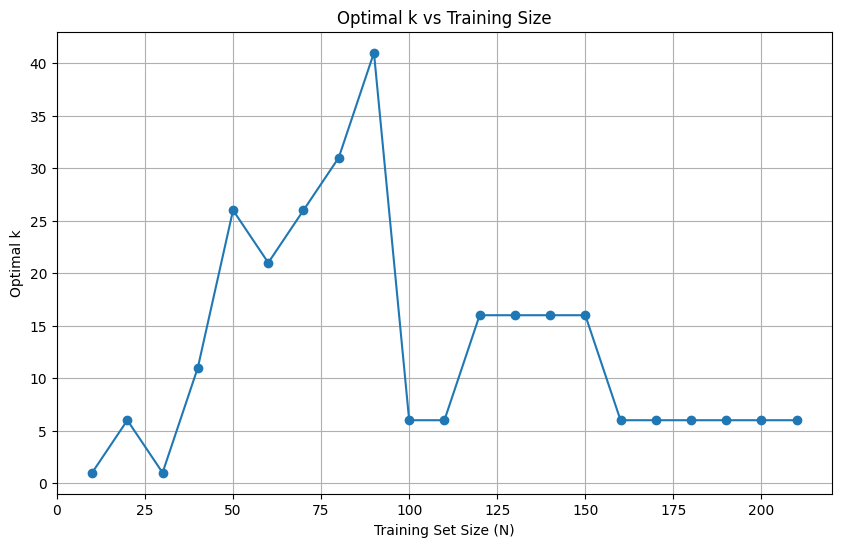

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, best_ks, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Optimal k')
plt.title('Optimal k vs Training Size')
plt.grid(True)
plt.show()

## (d) Replacing Euclidean with other metrics

### i. Minkowski Distance

* Note: I'm incrementing the k-candidate values by 1 as an increment of 5 is returning optimal k as '1' which is a case of overfitting.

In [33]:
k_candidates = list(range(1, 197, 1))  # 1, 2, 3, 4, ..., 196
print(f"k values: {k_candidates[:10]}... (total: {len(k_candidates)} values)")

metric_results = []


k values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]... (total: 196 values)


#### A. p=1 (Manhattan Distance)

In [34]:
print("Testing Manhattan Distance (Minkowski p=1)")

best_error_manhattan = float('inf')
optimal_k_manhattan = 1

for k in k_candidates:
    if k > len(X_train):
        continue
        
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    
    if error < best_error_manhattan:
        best_error_manhattan = error
        optimal_k_manhattan = k

print(f"Optimal k for Manhattan: {optimal_k_manhattan}")
print(f"Best test error: {best_error_manhattan:.4f}")

metric_results.append(['Manhattan (p=1)', optimal_k_manhattan, best_error_manhattan])


Testing Manhattan Distance (Minkowski p=1)
Optimal k for Manhattan: 4
Best test error: 0.1000


#### B. Various p values

In [35]:
print("Testing Minkowski Distance with different p values")

# p values: log10(p) -> {0.1, 0.2, 0.3, ..., 1.0}
log_p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_values = [10**log_p for log_p in log_p_values]

print(f"Testing p values: {[f'{p:.1f}' for p in p_values]}")
print(f"Using optimal k from Manhattan: {optimal_k_manhattan}")

best_error_minkowski = float('inf')
best_p = None
best_log_p = None

for i, p in enumerate(p_values):
    try:
        knn = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, 
                                 metric='minkowski', 
                                 metric_params={'p': p})
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        
        if error < best_error_minkowski:
            best_error_minkowski = error
            best_p = p
            best_log_p = log_p_values[i]
        
        print(f"p={p:.1f} (log10(p)={log_p_values[i]:.1f}): Error={error:.4f}")
        
    except Exception as e:
        print(f"p={p:.1f}: Failed - {str(e)}")

print(f"\nBest p value: {best_p:.1f}")
print(f"Best log10(p): {best_log_p:.1f}")
print(f"Best test error: {best_error_minkowski:.4f}")

metric_results.append([f'Minkowski (p={best_p:.1f})', optimal_k_manhattan, best_error_minkowski])


Testing Minkowski Distance with different p values
Testing p values: ['1.3', '1.6', '2.0', '2.5', '3.2', '4.0', '5.0', '6.3', '7.9', '10.0']
Using optimal k from Manhattan: 4
p=1.3 (log10(p)=0.1): Error=0.0800
p=1.6 (log10(p)=0.2): Error=0.0600
p=2.0 (log10(p)=0.3): Error=0.0600
p=2.5 (log10(p)=0.4): Error=0.0700
p=3.2 (log10(p)=0.5): Error=0.0600
p=4.0 (log10(p)=0.6): Error=0.0600
p=5.0 (log10(p)=0.7): Error=0.0600
p=6.3 (log10(p)=0.8): Error=0.0700
p=7.9 (log10(p)=0.9): Error=0.0800
p=10.0 (log10(p)=1.0): Error=0.0900

Best p value: 1.6
Best log10(p): 0.2
Best test error: 0.0600


/Users/dhruvsandu/Library/Mobile Documents/com~apple~CloudDocs/USC/552-Machine Learning/hw1/homework-1-dhruv0324/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/dhruvsandu/Library/Mobile Documents/com~apple~CloudDocs/USC/552-Machine Learning/hw1/homework-1-dhruv0324/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/dhruvsandu/Library/Mobile Documents/com~apple~CloudDocs/USC/552-Machine Learning/hw1/homework-1-dhruv0324/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/dhruvsandu/Library/Mobile D

#### p = infinity (Chebyshev Distance)

In [36]:
print("Testing Chebyshev Distance (Minkowski p→infinity)")

best_error_chebyshev = float('inf')
optimal_k_chebyshev = 1

for k in k_candidates:
    if k > len(X_train):
        continue
        
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    
    if error < best_error_chebyshev:
        best_error_chebyshev = error
        optimal_k_chebyshev = k

print(f"Optimal k for Chebyshev: {optimal_k_chebyshev}")
print(f"Best test error: {best_error_chebyshev:.4f}")

metric_results.append(['Chebyshev (p→∞)', optimal_k_chebyshev, best_error_chebyshev])


Testing Chebyshev Distance (Minkowski p→infinity)
Optimal k for Chebyshev: 2
Best test error: 0.0600


### ii. Mahalnobis Distance (needed to compute inverse of covariance matrix)

In [37]:
print("Testing Mahalanobis Distance")

# Calculate covariance matrix and its inverse
cov_matrix = np.cov(X_train.T)
cov_inv = np.linalg.inv(cov_matrix)

best_error_mahalanobis = float('inf')
optimal_k_mahalanobis = 1

for k in k_candidates:
    if k > len(X_train):
        continue
        
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', 
                               metric_params={'VI': cov_inv})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    
    if error < best_error_mahalanobis:
        best_error_mahalanobis = error
        optimal_k_mahalanobis = k

print(f"Optimal k for Mahalanobis: {optimal_k_mahalanobis}")
print(f"Best test error: {best_error_mahalanobis:.4f}")

metric_results.append(['Mahalanobis', optimal_k_mahalanobis, best_error_mahalanobis])


Testing Mahalanobis Distance


/Users/dhruvsandu/Library/Mobile Documents/com~apple~CloudDocs/USC/552-Machine Learning/hw1/homework-1-dhruv0324/venv/lib/python3.10/site-packages/sklearn/utils/parallel.py:147: RuntimeWarning: invalid value encountered in sqrt
  return self.function(*args, **kwargs)
/Users/dhruvsandu/Library/Mobile Documents/com~apple~CloudDocs/USC/552-Machine Learning/hw1/homework-1-dhruv0324/venv/lib/python3.10/site-packages/sklearn/utils/parallel.py:147: RuntimeWarning: invalid value encountered in sqrt
  return self.function(*args, **kwargs)
/Users/dhruvsandu/Library/Mobile Documents/com~apple~CloudDocs/USC/552-Machine Learning/hw1/homework-1-dhruv0324/venv/lib/python3.10/site-packages/sklearn/utils/parallel.py:147: RuntimeWarning: invalid value encountered in sqrt
  return self.function(*args, **kwargs)
/Users/dhruvsandu/Library/Mobile Documents/com~apple~CloudDocs/USC/552-Machine Learning/hw1/homework-1-dhruv0324/venv/lib/python3.10/site-packages/sklearn/utils/parallel.py:147: RuntimeWarning: in

Optimal k for Mahalanobis: 4
Best test error: 0.1700


In [38]:
# Summary Table
print("=" * 60)
print("SUMMARY: Distance Metric Comparison Results")
print("=" * 60)

results_df = pd.DataFrame(metric_results, columns=['Distance Metric', 'Optimal k*', 'Test Error'])

print("\nResults Table:")
print(results_df.to_string(index=False))

print("\n" + "=" * 60)


SUMMARY: Distance Metric Comparison Results

Results Table:
  Distance Metric  Optimal k*  Test Error
  Manhattan (p=1)           4        0.10
Minkowski (p=1.6)           4        0.06
  Chebyshev (p→∞)           2        0.06
      Mahalanobis           4        0.17



## (e) Weighted Voting

In [39]:
def evaluate_weighted_knn(metric, k_values, X_train, y_train, X_test, y_test):
    best_error = float('inf')
    best_k = 1
    
    for k in k_values:
        if k > len(X_train):
            continue
            
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        
        if error < best_error:
            best_error = error
            best_k = k
    
    return best_k, best_error

In [40]:
# k candidates: {1, 2, 3, 4, ..., 196}
k_candidates = list(range(1, 197, 1))
print(f"Testing weighted KNN with k -> {{1, 2, 3, 4, ..., 196}} (total: {len(k_candidates)} values)")

dist_metrics = ['euclidean', 'manhattan', 'chebyshev']
weighted_results = []

print("=" * 60)
print("WEIGHTED KNN RESULTS")
print("=" * 60)

for metric in dist_metrics:
    print(f"\nTesting {metric.title()} distance...")
    best_k, best_error = evaluate_weighted_knn(
        metric, k_candidates, X_train, y_train, X_test, y_test
    )
    weighted_results.append([f"{metric.title()} (weighted)", best_k, best_error])
    print(f"Optimal k* = {best_k}, Best test error = {best_error:.4f}")


weighted_df = pd.DataFrame(weighted_results, columns=['Distance Metric', 'Optimal k*', 'Test Error'])
print("\n" + "=" * 60)
print("SUMMARY: Weighted KNN Results")
print("=" * 60)
print(weighted_df.to_string(index=False))


Testing weighted KNN with k -> {1, 2, 3, 4, ..., 196} (total: 196 values)
WEIGHTED KNN RESULTS

Testing Euclidean distance...
Optimal k* = 3, Best test error = 0.0900

Testing Manhattan distance...
Optimal k* = 9, Best test error = 0.1000

Testing Chebyshev distance...
Optimal k* = 15, Best test error = 0.1000

SUMMARY: Weighted KNN Results
     Distance Metric  Optimal k*  Test Error
Euclidean (weighted)           3        0.09
Manhattan (weighted)           9        0.10
Chebyshev (weighted)          15        0.10


## (f) 

In [42]:
min(train_errors)


0.0

### Answer:The lowest training error rate achieved was 0.0000 (0.00%), which corresponds to 100% training accuracy. This was achieved with k = 1 (1-nearest neighbor) using standard KNN with Euclidean distance. This is again a case of overfitting